In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import kagglehub

In [ ]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

path = "/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3"

# Confirm the actual file name (usually it's 'creditcard.csv')
csv_path = os.path.join(path, "creditcard.csv")

# Load the CSV
df = pd.read_csv(csv_path)

df.head()

100%|██████████| 66.0M/66.0M [00:03<00:00, 23.0MB/s]

Extracting files...


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#Data cleaning and standardize

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
#Split the data

from sklearn.model_selection import train_test_split

# 1. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

       Legit       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



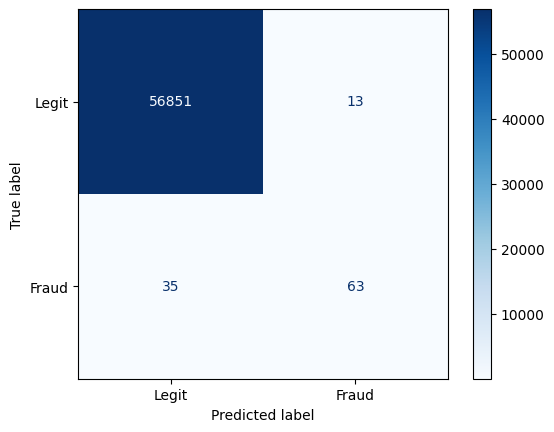

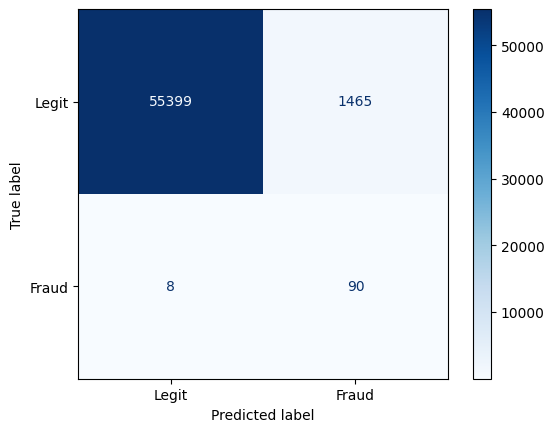

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# 2. Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# 3. Predict on test data
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))
# 4. Show confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap='Blues')


#Smote
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_sm, y_train_sm)

# 3. Predict on test data
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))
# 4. Show confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap='Blues')


Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



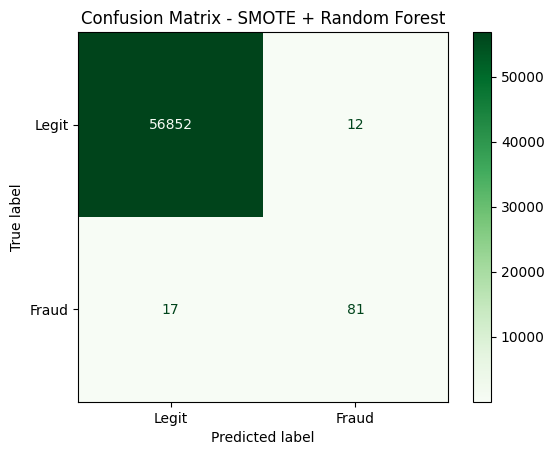

In [ ]:
# Random forest + Smote
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - SMOTE + Random Forest")
plt.show()


Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



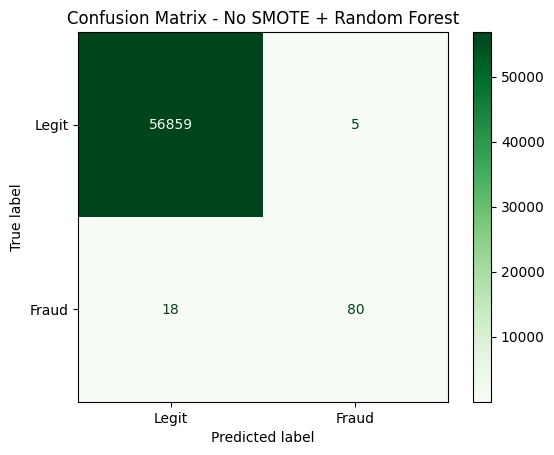

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - No SMOTE + Random Forest")
plt.show()

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.76      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



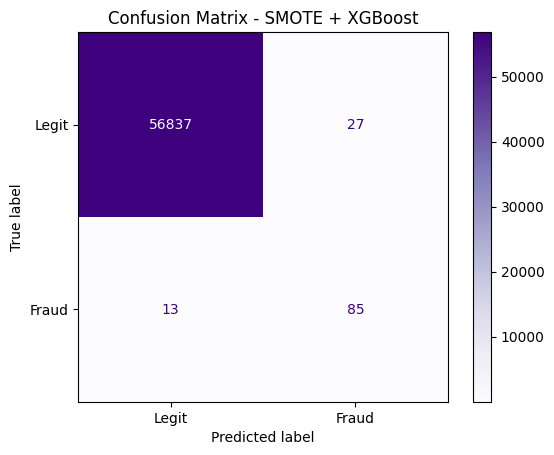

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
print("Training XGBoost...")
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_sm, y_train_sm)

# Evaluate on test set
y_pred = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - SMOTE + XGBoost")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:46:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



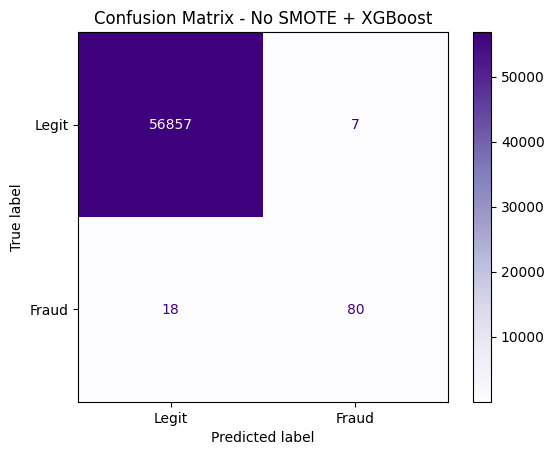

In [ ]:
xgb.fit(X_train, y_train)

# Evaluate on test set
y_pred = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - No SMOTE + XGBoost")
plt.show()


Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



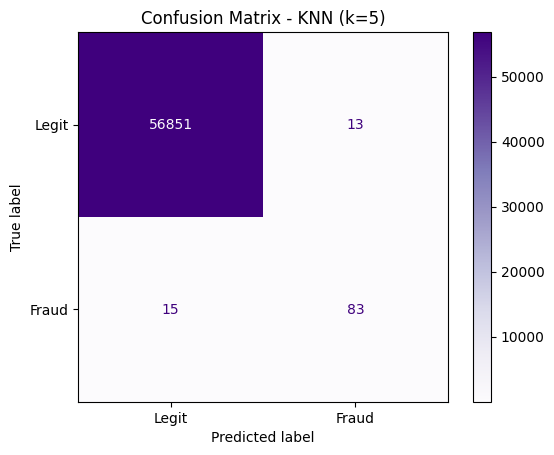

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# --- Step 2: Predict Probabilities ---
y_probs = knn.predict_proba(X_test)[:, 1]

# --- Step 3: Set Threshold and Predict Labels ---
threshold = 0.4  # You can change this to 0.3, or tune it dynamically
y_pred = (y_probs >= threshold).astype(int)

# --- Step 4: Evaluation ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()


Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.39      0.90      0.54        98

    accuracy                           1.00     56962
   macro avg       0.69      0.95      0.77     56962
weighted avg       1.00      1.00      1.00     56962



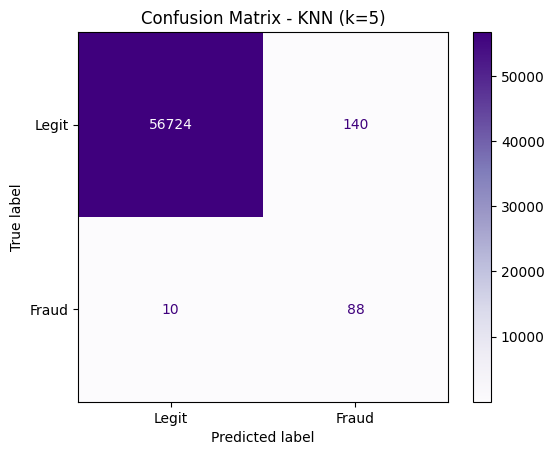

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_sm, y_train_sm)

# --- Step 2: Predict Probabilities ---
y_probs = knn.predict_proba(X_test)[:, 1]

# --- Step 3: Set Threshold and Predict Labels ---
threshold = 0.4  # You can change this to 0.3, or tune it dynamically
y_pred = (y_probs >= threshold).astype(int)

# --- Step 4: Evaluation ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()


Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.44      0.88      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962



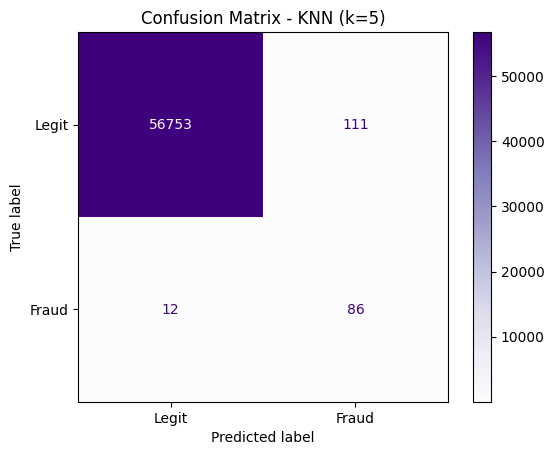

In [ ]:
threshold = 0.6  # You can change this to 0.3, or tune it dynamically
y_pred = (y_probs >= threshold).astype(int)

# --- Step 4: Evaluation ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:47:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.96      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



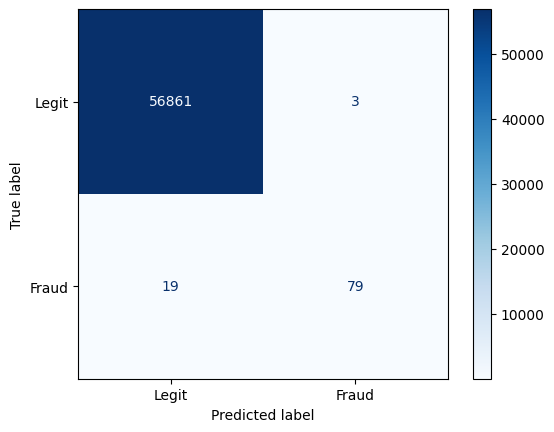

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


voting_clf = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('logreg', logreg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'  # use predicted probabilities
)

# 4. Fit ensemble
voting_clf.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = voting_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap='Blues')

# Classification report
print(classification_report(y_test, y_pred, target_names=["Legit", "Fraud"]))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test)


              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     56864
       Fraud       0.43      0.89      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962



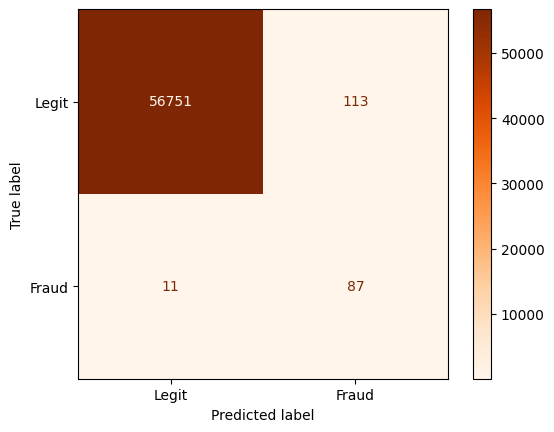

In [ ]:
pred_knn = knn.predict(X_test)
pred_logreg = logreg.predict(X_test)
pred_rf = rf.predict(X_test)
pred_xgb = xgb.predict(X_test)

final_pred = (
    (pred_knn == 1) |
    (pred_logreg == 1) |
    (pred_rf == 1) |
    (pred_xgb == 1)
).astype(int)




from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, final_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Legit", "Fraud"])
disp.plot(cmap='Oranges')

print(classification_report(y_test, final_pred, target_names=["Legit", "Fraud"]))

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers
scoring = {
    'F1': 'f1',
    'AUPRC': 'average_precision'
}

# Store results
results = []

for name, model in models.items():
    print(f"Training {name}...")
    scores = cross_validate(
        model, X_scaled, y,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        return_train_score=False
    )

    results.append({
        'Model': name,
        'F1 Mean': np.mean(scores['test_F1']),
        'F1 Std': np.std(scores['test_F1']),
        'AUPRC Mean': np.mean(scores['test_AUPRC']),
        'AUPRC Std': np.std(scores['test_AUPRC']),
        'Fit Time (s)': np.mean(scores['fit_time'])
    })

# Display as DataFrame
cv_results_df = pd.DataFrame(results)
cv_results_df = cv_results_df.sort_values(by="AUPRC Mean", ascending=False)
cv_results_df.reset_index(drop=True, inplace=True)

print(cv_results_df)

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training K-Nearest Neighbors...
                 Model   F1 Mean    F1 Std  AUPRC Mean  AUPRC Std  \
0              XGBoost  0.869302  0.022179    0.857750   0.021393   
1        Random Forest  0.858771  0.017664    0.845316   0.025657   
2  K-Nearest Neighbors  0.847855  0.030239    0.808461   0.024962   
3  Logistic Regression  0.722178  0.032531    0.759057   0.021497   

   Fit Time (s)  
0      4.484274  
1    269.012034  
2      0.090217  
3      0.578751  


[{'Model': 'Logistic Regression',
  'F1 Mean': np.float64(0.722178450945503),
  'F1 Std': np.float64(0.03253110236995348),
  'AUPRC Mean': np.float64(0.7590572482942329),
  'AUPRC Std': np.float64(0.021497419969130776),
  'Fit Time (s)': np.float64(0.5787510871887207)},
 {'Model': 'Random Forest',
  'F1 Mean': np.float64(0.8587705244393853),
  'F1 Std': np.float64(0.017664258191757362),
  'AUPRC Mean': np.float64(0.8453157035246239),
  'AUPRC Std': np.float64(0.025657291126014083),
  'Fit Time (s)': np.float64(269.0120340824127)},
 {'Model': 'XGBoost',
  'F1 Mean': np.float64(0.8693023982324819),
  'F1 Std': np.float64(0.02217882765418055),
  'AUPRC Mean': np.float64(0.8577499929135495),
  'AUPRC Std': np.float64(0.021393368478305166),
  'Fit Time (s)': np.float64(4.484274291992188)},
 {'Model': 'K-Nearest Neighbors',
  'F1 Mean': np.float64(0.8478546833145957),
  'F1 Std': np.float64(0.03023943074070316),
  'AUPRC Mean': np.float64(0.8084612693453568),
  'AUPRC Std': np.float64(0.0249

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define models in pipelines with SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "XGBoost": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]),
    "K-Nearest Neighbors": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])
}


# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers
scoring = {
    'F1': 'f1',
    'AUPRC': 'average_precision'
}

# Store results
results = []

for name, model in models.items():
    print(f"Training {name}...")
    scores = cross_validate(
        model, X_scaled, y,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        return_train_score=False
    )

    results.append({
        'Model': name,
        'F1 Mean': np.mean(scores['test_F1']),
        'F1 Std': np.std(scores['test_F1']),
        'AUPRC Mean': np.mean(scores['test_AUPRC']),
        'AUPRC Std': np.std(scores['test_AUPRC']),
        'Fit Time (s)': np.mean(scores['fit_time'])
    })

# Display as DataFrame
cv_results_df_sm = pd.DataFrame(results)
cv_results_df_sm = cv_results_df_sm.sort_values(by="AUPRC Mean", ascending=False)
cv_results_df_sm.reset_index(drop=True, inplace=True)

print(cv_results_df_sm)

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training K-Nearest Neighbors...
                 Model   F1 Mean    F1 Std  AUPRC Mean  AUPRC Std  \
0              XGBoost  0.799186  0.027900    0.854553   0.025197   
1        Random Forest  0.860313  0.028413    0.850465   0.028194   
2  Logistic Regression  0.111308  0.005886    0.742649   0.021249   
3  K-Nearest Neighbors  0.601619  0.014536    0.626787   0.033850   

   Fit Time (s)  
0      9.596449  
1    449.717430  
2      2.432197  
3      0.573825  


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# Define 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define model pipelines with SMOTE
models_oversample = {
    "Logistic Regression": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "XGBoost": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42))
    ]),
    "KNN": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])
}

ensemble_model = ImbPipeline([
    ('undersample', ClusterCentroids(random_state=42)),
    ('model', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(
            n_estimators=100,
            max_depth=20,
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ], voting='soft'))
])

# Add ensemble model to the model dictionary
models_oversample["Ensemble"] = ensemble_model


# Results storage
confusion_data = []

# Loop through each model
for model_name, pipeline in models_oversample.items():
    print(f"\nEvaluating {model_name}...")

    fold_idx = 1
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Get confusion matrix: TN, FP, FN, TP
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        confusion_data.append({
            'Model': model_name,
            'Fold': fold_idx,
            'TP': tp,
            'FP': fp,
            'TN': tn,
            'FN': fn
        })

        fold_idx += 1

# Convert to DataFrame for display
confusion_df = pd.DataFrame(confusion_data)
confusion_df['Precision'] = confusion_df['TP'] / (confusion_df['TP'] + confusion_df['FP'] + 1e-6)
confusion_df['Recall'] = confusion_df['TP'] / (confusion_df['TP'] + confusion_df['FN'] + 1e-6)

# Average results per model
summary_df = confusion_df.groupby("Model")[["TP", "FP", "TN", "FN", "Precision", "Recall"]].mean().round(2)
print(summary_df)


Evaluating Logistic Regression...

Evaluating Random Forest...

Evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Evaluating KNN...

Evaluating Ensemble...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:57:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

                       TP      FP       TN    FN  Precision  Recall
Model                                                              
Ensemble             90.8  2530.2  54332.8   7.6       0.03    0.92
KNN                  84.0    97.0  56766.0  14.4       0.46    0.85
Logistic Regression  89.8  1428.8  55434.2   8.6       0.06    0.91
Random Forest        81.4     9.4  56853.6  17.0       0.90    0.83
XGBoost              83.4    22.6  56840.4  15.0       0.79    0.85


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        max_depth=20,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Add ensemble model using soft voting
ensemble = VotingClassifier(
    estimators=[
        ('lr', models["Logistic Regression"]),
        ('rf', models["Random Forest"]),
        ('xgb', models["XGBoost"]),
        ('knn', models["K-Nearest Neighbors"])
    ],
    voting='soft'
)
models["Ensemble"] = ensemble

# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Results storage
confusion_data_2 = []

# Loop through each model
for model_name, model in models.items():
    fold_idx = 1
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Get confusion matrix: TN, FP, FN, TP
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        confusion_data_2.append({
            'Model': model_name,
            'Fold': fold_idx,
            'TP': tp,
            'FP': fp,
            'TN': tn,
            'FN': fn
        })

        fold_idx += 1

# Convert to DataFrame for display
confusion_df_2 = pd.DataFrame(confusion_data_2)
confusion_df_2['Precision'] = confusion_df_2['TP'] / (confusion_df_2['TP'] + confusion_df_2['FP'] + 1e-6)
confusion_df_2['Recall'] = confusion_df_2['TP'] / (confusion_df_2['TP'] + confusion_df_2['FN'] + 1e-6)

# Average results per model
summary_df_2 = confusion_df_2.groupby("Model")[["TP", "FP", "TN", "FN", "Precision", "Recall"]].mean().round(2)
print(summary_df_2)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

                       TP   FP       TN    FN  Precision  Recall
Model                                                           
Ensemble             77.0  3.8  56859.2  21.4       0.95    0.78
K-Nearest Neighbors  76.2  5.2  56857.8  22.2       0.94    0.77
Logistic Regression  61.0  9.4  56853.6  37.4       0.87    0.62
Random Forest        77.2  4.2  56858.8  21.2       0.95    0.78
XGBoost              78.6  3.8  56859.2  19.8       0.95    0.80


In [ ]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np


# Modify pipelines to use KMeans-based undersampling instead of SMOTE
models_undersample = {
    "Logistic Regression": ImbPipeline([
        ('undersample', ClusterCentroids(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ('undersample', ClusterCentroids(random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "XGBoost": ImbPipeline([
        ('undersample', ClusterCentroids(random_state=42)),
        ('model', XGBClassifier(
            n_estimators=100,
            max_depth=20,
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42))
    ]),
    "KNN": ImbPipeline([
        ('undersample', ClusterCentroids(random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])
}

# Create ensemble model using soft voting (requires probability output)
ensemble_model = ImbPipeline([
    ('undersample', ClusterCentroids(random_state=42)),
    ('model', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(
            n_estimators=100,
            max_depth=20,
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ], voting='soft'))
])

# Add ensemble model to the model dictionary
models_undersample["Ensemble"] = ensemble_model


# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Results storage
confusion_data_3 = []

# Loop through each model
for model_name, pipeline in models_undersample.items():
    print(f"\nEvaluating {model_name}...")

    fold_idx = 1
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Get confusion matrix: TN, FP, FN, TP
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        confusion_data_3.append({
            'Model': model_name,
            'Fold': fold_idx,
            'TP': tp,
            'FP': fp,
            'TN': tn,
            'FN': fn
        })

        fold_idx += 1

# Convert to DataFrame for display
confusion_df_3 = pd.DataFrame(confusion_data_3)
confusion_df_3['Precision'] = confusion_df_3['TP'] / (confusion_df_3['TP'] + confusion_df_3['FP'] + 1e-6)
confusion_df_3['Recall'] = confusion_df_3['TP'] / (confusion_df_3['TP'] + confusion_df_3['FN'] + 1e-6)

# Average results per model
summary_df_3 = confusion_df_3.groupby("Model")[["TP", "FP", "TN", "FN", "Precision", "Recall"]].mean().round(2)
print(summary_df_3)


Evaluating Logistic Regression...

Evaluating Random Forest...

Evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:43:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Evaluating KNN...

Evaluating Ensemble...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:44:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:44:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

                       TP       FP       TN    FN  Precision  Recall
Model                                                               
Ensemble             90.8   2530.2  54332.8   7.6       0.03    0.92
KNN                  86.2    405.2  56457.8  12.2       0.18    0.88
Logistic Regression  88.6   2078.4  54784.6   9.8       0.04    0.90
Random Forest        92.6  15887.4  40975.6   5.8       0.01    0.94
XGBoost              94.0  17040.6  39822.4   4.4       0.01    0.96


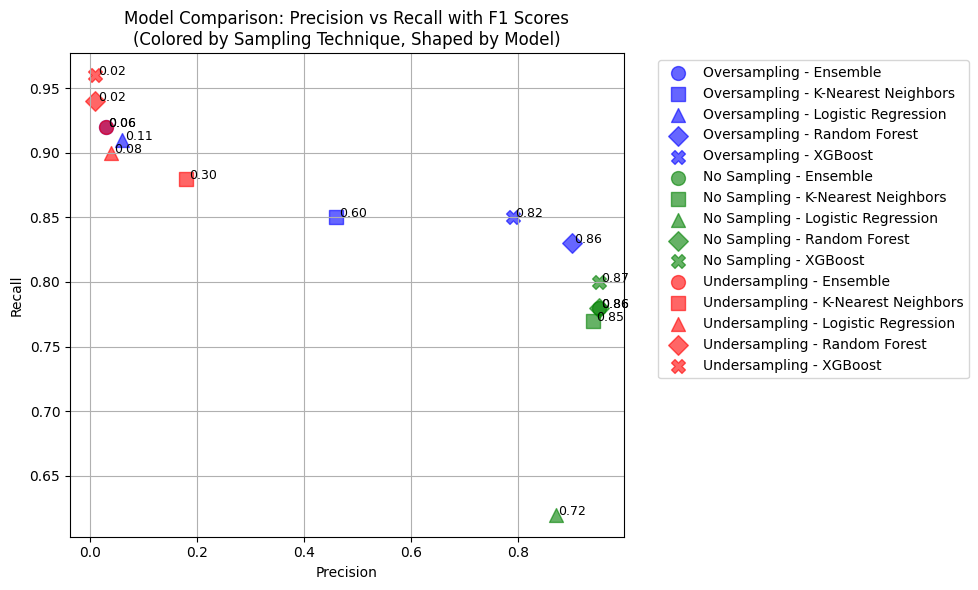

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the data manually
data = [
    # Oversampling
    {"Sampling": "Oversampling", "Model": "Ensemble", "Precision": 0.03, "Recall": 0.92},
    {"Sampling": "Oversampling", "Model": "K-Nearest Neighbors", "Precision": 0.46, "Recall": 0.85},
    {"Sampling": "Oversampling", "Model": "Logistic Regression", "Precision": 0.06, "Recall": 0.91},
    {"Sampling": "Oversampling", "Model": "Random Forest", "Precision": 0.90, "Recall": 0.83},
    {"Sampling": "Oversampling", "Model": "XGBoost", "Precision": 0.79, "Recall": 0.85},

    # No Sampling
    {"Sampling": "No Sampling", "Model": "Ensemble", "Precision": 0.95, "Recall": 0.78},
    {"Sampling": "No Sampling", "Model": "K-Nearest Neighbors", "Precision": 0.94, "Recall": 0.77},
    {"Sampling": "No Sampling", "Model": "Logistic Regression", "Precision": 0.87, "Recall": 0.62},
    {"Sampling": "No Sampling", "Model": "Random Forest", "Precision": 0.95, "Recall": 0.78},
    {"Sampling": "No Sampling", "Model": "XGBoost", "Precision": 0.95, "Recall": 0.80},

    # Undersampling
    {"Sampling": "Undersampling", "Model": "Ensemble", "Precision": 0.03, "Recall": 0.92},
    {"Sampling": "Undersampling", "Model": "K-Nearest Neighbors", "Precision": 0.18, "Recall": 0.88},
    {"Sampling": "Undersampling", "Model": "Logistic Regression", "Precision": 0.04, "Recall": 0.90},
    {"Sampling": "Undersampling", "Model": "Random Forest", "Precision": 0.01, "Recall": 0.94},
    {"Sampling": "Undersampling", "Model": "XGBoost", "Precision": 0.01, "Recall": 0.96},
]

# Create DataFrame
df = pd.DataFrame(data)

# Compute F1-score
df["F1"] = 2 * (df["Precision"] * df["Recall"]) / (df["Precision"] + df["Recall"] + 1e-6)

# Marker shapes for each model
markers = {
    "Ensemble": "o",
    "K-Nearest Neighbors": "s",
    "Logistic Regression": "^",
    "Random Forest": "D",
    "XGBoost": "X"
}

# Color mapping for sampling techniques
colors = {
    "Oversampling": "blue",
    "No Sampling": "green",
    "Undersampling": "red"
}

# Create scatter plot
plt.figure(figsize=(10, 6))

for _, row in df.iterrows():
    plt.scatter(row["Precision"], row["Recall"],
                color=colors[row["Sampling"]],
                marker=markers[row["Model"]],
                s=100,
                alpha=0.6,
                label=f'{row["Sampling"]} - {row["Model"]}')
    # Annotate with F1
    plt.text(row["Precision"] + 0.005, row["Recall"], f'{row["F1"]:.2f}', fontsize=9)

# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Model Comparison: Precision vs Recall with F1 Scores\n(Colored by Sampling Technique, Shaped by Model)")
plt.grid(True)
plt.tight_layout()
plt.show()


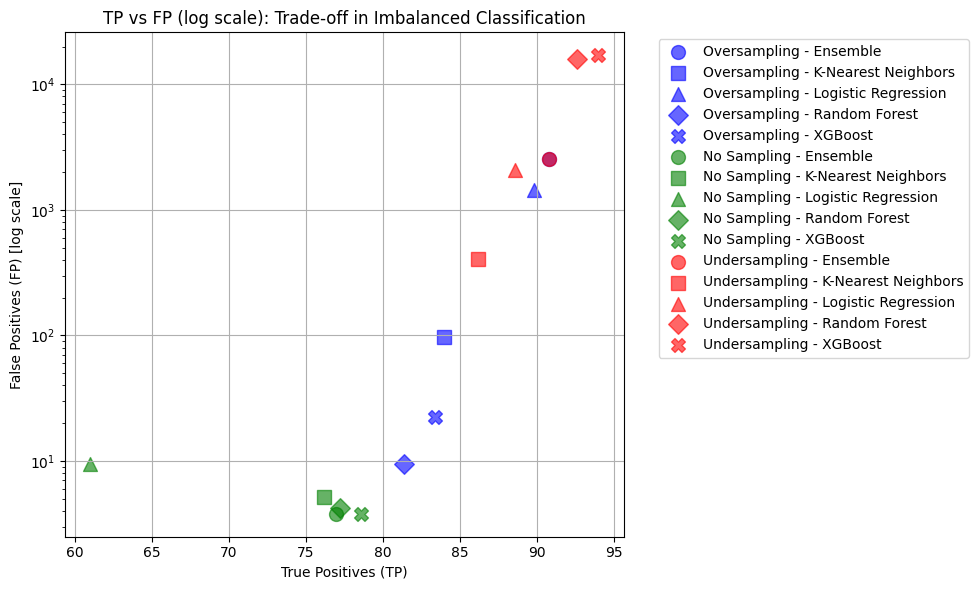

In [ ]:
# Define TP and FP values for each (Sampling, Model) pair
tp_fp_data = {
    ("Oversampling", "Ensemble"): (90.8, 2530.2),
    ("Oversampling", "K-Nearest Neighbors"): (84.0, 97.0),
    ("Oversampling", "Logistic Regression"): (89.8, 1428.8),
    ("Oversampling", "Random Forest"): (81.4, 9.4),
    ("Oversampling", "XGBoost"): (83.4, 22.6),

    ("No Sampling", "Ensemble"): (77.0, 3.8),
    ("No Sampling", "K-Nearest Neighbors"): (76.2, 5.2),
    ("No Sampling", "Logistic Regression"): (61.0, 9.4),
    ("No Sampling", "Random Forest"): (77.2, 4.2),
    ("No Sampling", "XGBoost"): (78.6, 3.8),

    ("Undersampling", "Ensemble"): (90.8, 2530.2),
    ("Undersampling", "K-Nearest Neighbors"): (86.2, 405.2),
    ("Undersampling", "Logistic Regression"): (88.6, 2078.4),
    ("Undersampling", "Random Forest"): (92.6, 15887.4),
    ("Undersampling", "XGBoost"): (94.0, 17040.6)
}

# Add TP and FP to the dataframe
df["TP"] = df.apply(lambda row: tp_fp_data[(row["Sampling"], row["Model"])][0], axis=1)
df["FP"] = df.apply(lambda row: tp_fp_data[(row["Sampling"], row["Model"])][1], axis=1)

# Plot TP vs log(FP)
plt.figure(figsize=(10, 6))

for _, row in df.iterrows():
    plt.scatter(row["TP"], row["FP"],
                color=colors[row["Sampling"]],
                marker=markers[row["Model"]],
                s=100,
                alpha=0.6,
                label=f'{row["Sampling"]} - {row["Model"]}')

# Use log scale for y-axis
plt.yscale("log")

# De-duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("True Positives (TP)")
plt.ylabel("False Positives (FP) [log scale]")
plt.title("TP vs FP (log scale): Trade-off in Imbalanced Classification")
plt.grid(True)
plt.tight_layout()
plt.show()


Log-linear regression equation: log(FP) = -20.0420 + 0.3002 * TP


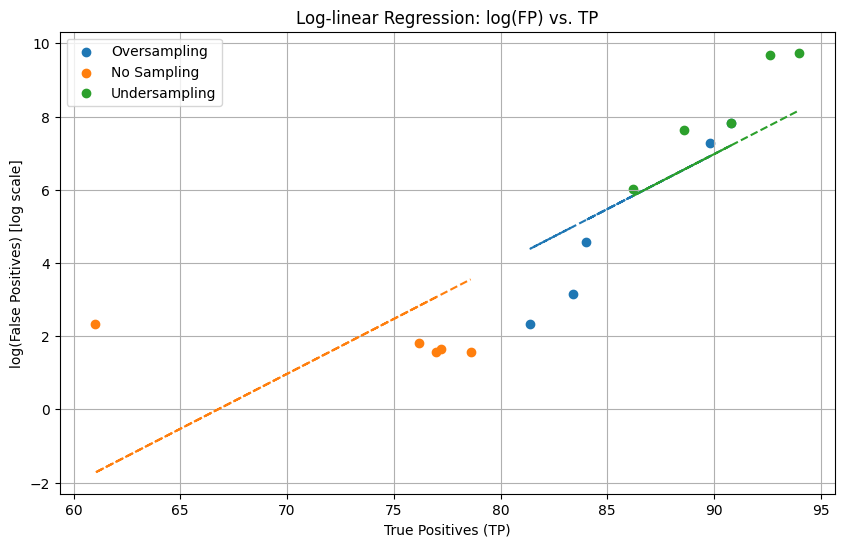

In [ ]:
# prompt: apply log lienar regression to the data such that log(FP) = B0 + b1*TP, you might want to remove the data point - NOsampling -logistic regerssion since it is an outlier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame with 'TP' and 'FP' columns
# Filter out the outlier if necessary (example assuming 'NOsampling' and 'logistic regerssion')
# df_filtered = df[~((df['Sampling'] == 'No Sampling') & (df['Model'] == 'Logistic Regression'))]

# Apply log transformation to FP
df['log_FP'] = np.log1p(df['FP']) # Use log1p to handle zero values

# Prepare the data for linear regression
X = df[['TP']]  # Independent variable
y = df['log_FP']  # Dependent variable

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model coefficients
B0 = model.intercept_
b1 = model.coef_[0]

print(f"Log-linear regression equation: log(FP) = {B0:.4f} + {b1:.4f} * TP")

# Make predictions
df['predicted_log_FP'] = model.predict(X)


# Plot the results
plt.figure(figsize=(10, 6))

for sampling_method in df["Sampling"].unique():
    subset = df[df["Sampling"] == sampling_method]
    plt.scatter(subset['TP'], subset['log_FP'], label=sampling_method)
    plt.plot(subset['TP'], subset['predicted_log_FP'], linestyle='--')


plt.xlabel("True Positives (TP)")
plt.ylabel("log(False Positives) [log scale]")
plt.title("Log-linear Regression: log(FP) vs. TP")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
10**(B0 + b1*98)

np.float64(2360628296.726939)